In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gen_norm_mat(epsilon, dim=(2, 2)):
    """Generate a square matrix with a 2-norm equal to epsilon.
    """
    A = np.random.normal(size=dim)
    u, s, vh = np.linalg.svd(A)
    scaled_s = s * epsilon/s[0]
    result = u @ np.diag(scaled_s) @ vh
    # result_norm = np.linalg.norm(result, ord=2)
    # if np.isclose(result_norm, epsilon, rtol=.000000001):
    #     print(epsilon)
    #     print('Algorithm failed to generate matrix with specified 2-norm size.\n Generated matrix with norm: ' + str(result_norm) + ' instead.')
    # else:
    return result

# Problem 26.2
Let $A$ be the $32 \times 32$ matrix with $-1$ on the main diagonal and $1$ on the first and second superdiagonals, and $0$ elsewhere. 

In [4]:
m = 32
A = np.zeros((m, m)) + -1 * np.eye(m, m) + np.diag(np.ones(m-1), k=1) + np.diag(np.ones(m-2), k=2)

**(a)** Using an SVD algorithm built into Python or another software system, together with contour plotting software, generate a plot of the boundaries of the 2-norm $\epsilon$-pseudospectra of $A$ for $\epsilon = 10^{-1}, 10^{-2}, \dots, 10^{-8}$.

In [5]:
powers = -np.arange(1, 9)
base = 10 * np.ones(8)
epsilon = np.power(base, powers)

In [6]:
dA = [gen_norm_mat(epsilon=eps, dim=(m, m)) for eps in epsilon]

In [7]:
for mat in dA:
    print(np.linalg.norm(mat, ord=2))

0.09999999999999999
0.010000000000000007
0.0009999999999999994
0.00010000000000000009
9.999999999999992e-06
9.999999999999995e-07
9.999999999999996e-08
1e-08


In [8]:
A_plus_dA = A + dA

In [9]:
# Compute eigenvalues of A_plus_dA
eigs_A_plus_dA = np.linalg.eigvals(A_plus_dA)

In [22]:
print(eigs_A_plus_dA[0].real)
print(eigs_A_plus_dA[0].imag)
X, Y np.

[ 0.63477139  0.63477139  0.43776029  0.43776029  0.07147681  0.07147681
 -0.38571905 -0.38571905 -0.89557981 -0.89557981 -0.16795176 -1.19471318
 -1.19471318 -1.51306573 -1.51306573 -1.80711624 -1.80711624 -1.75519101
 -1.75519101 -1.88198261 -1.88198261 -1.86792808 -1.74363534 -1.64526004
 -1.64526004 -1.33428325 -1.33428325 -1.03471922 -1.128733   -1.128733
 -1.14930975 -1.32692596]
[ 0.24527946 -0.24527946  0.82622637 -0.82622637  1.17173156 -1.17173156
  1.46138795 -1.46138795  1.36971145 -1.36971145  0.          1.27266189
 -1.27266189  1.15618631 -1.15618631  0.77733967 -0.77733967  0.57768527
 -0.57768527  0.32444903 -0.32444903  0.          0.          0.25302546
 -0.25302546  0.27022193 -0.27022193  0.          0.14846666 -0.14846666
  0.          0.        ]


In [29]:
# Create meshgrid for each level
mesh = [np.meshgrid(eigs.real, eigs.imag) for eigs in eigs_A_plus_dA]

In [49]:
np.flip(epsilon)

array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])

c:\Users\mikea\AppData\Local\Programs\Python\Python310\envs\byu_510\lib\site-packages\numpy\ma\core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


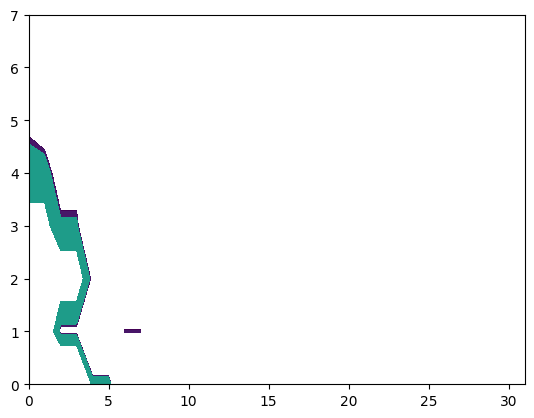

In [50]:
plt.contourf(eigs_A_plus_dA, np.flip(epsilon))

In [54]:
eigs_A_plus_dA

array([[ 0.63477139+0.24527946j,  0.63477139-0.24527946j,
         0.43776029+0.82622637j,  0.43776029-0.82622637j,
         0.07147681+1.17173156j,  0.07147681-1.17173156j,
        -0.38571905+1.46138795j, -0.38571905-1.46138795j,
        -0.89557981+1.36971145j, -0.89557981-1.36971145j,
        -0.16795176+0.j        , -1.19471318+1.27266189j,
        -1.19471318-1.27266189j, -1.51306573+1.15618631j,
        -1.51306573-1.15618631j, -1.80711624+0.77733967j,
        -1.80711624-0.77733967j, -1.75519101+0.57768527j,
        -1.75519101-0.57768527j, -1.88198261+0.32444903j,
        -1.88198261-0.32444903j, -1.86792808+0.j        ,
        -1.74363534+0.j        , -1.64526004+0.25302546j,
        -1.64526004-0.25302546j, -1.33428325+0.27022193j,
        -1.33428325-0.27022193j, -1.03471922+0.j        ,
        -1.128733  +0.14846666j, -1.128733  -0.14846666j,
        -1.14930975+0.j        , -1.32692596+0.j        ],
       [ 0.25139176+0.25490892j,  0.25139176-0.25490892j,
        -0.01